## Estimation of the temperature of stator winding bar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use('ggplot')

In [2]:
# read in the test data (voltages of thermocouples)
# header u1-u10 thermocouples along the winding bar; 
# u11 - a thermocouple on a bar emersed in water
# u12 - a thermocouple in the water 
header = ['t', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12']
df = pd.read_csv('pomiary.txt', sep='\t', header=None, names=header)
df.head()

,t,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12
0,0,0.09,0.12,0.12,0.13,0.13,0.13,0.15,0.15,0.15,0.13,0.02,0.01
1,2,0.24,0.35,0.37,0.39,0.38,0.39,0.40,0.39,0.36,0.25,0.16,0.01
2,4,0.32,0.50,0.56,0.60,0.60,0.60,0.62,0.57,0.50,0.32,0.18,0.01
3,6,0.38,0.64,0.74,0.80,0.80,0.81,0.81,0.73,0.62,0.37,0.19,0.01
4,8,0.42,0.74,0.88,0.98,0.99,0.99,0.99,0.87,0.72,0.42,0.20,0.01


In [3]:
# definition of thermocouple function
def getTemp(u):
    # coefficient a [degC/mV]
    a = 24
    return a*u + 19

In [4]:
t = df['t']
dfT = df.iloc[:,1:13].apply(getTemp)
header = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12']
dfT.columns = header
dfT.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12
0,21.16,21.88,21.88,22.12,22.12,22.12,22.60,22.60,22.60,22.12,19.48,19.24
1,24.76,27.40,27.88,28.36,28.12,28.36,28.60,28.36,27.64,25.00,22.84,19.24
2,26.68,31.00,32.44,33.40,33.40,33.40,33.88,32.68,31.00,26.68,23.32,19.24
3,28.12,34.36,36.76,38.20,38.20,38.44,38.44,36.52,33.88,27.88,23.56,19.24
4,29.08,36.76,40.12,42.52,42.76,42.76,42.76,39.88,36.28,29.08,23.80,19.24


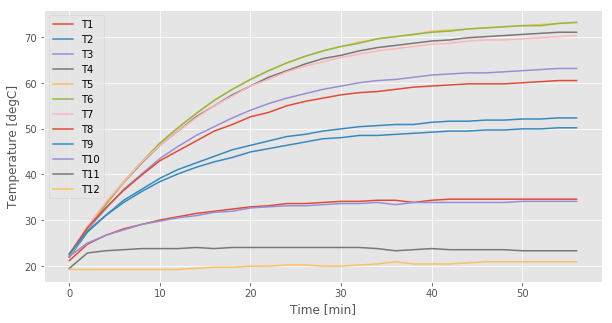

In [5]:
plt.figure(figsize=(10,5))
for k in dfT.columns:
    plt.plot(t, dfT[k], label=k)
plt.xlabel('Time [min]')
plt.ylabel('Temperature [degC]')
plt.legend();

In [6]:
# max temperatures by thermocouples
dfT.max()

T1     34.60
T2     52.36
T3     63.16
T4     71.08
T5     73.24
T6     73.24
T7     70.36
T8     60.52
T9     50.20
T10    34.12
T11    24.04
T12    20.92
dtype: float64

In [7]:
# max winding temperature
max(dfT.max())

73.239999999999995